In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

In [2]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# bank_customer_survey.csv has 45211 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('bank_customer_survey.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'bank_customer_survey.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 17 columns


In [3]:
df=pd.read_csv("bank_customer_survey.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [4]:
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [5]:
df.shape

(45211, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
    #print("Missing check:",missing_data )
    return missing_data
missing_check(df)

,Total,Percent
y,0,0.0
loan,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
balance,0,0.0
housing,0,0.0
contact,0,0.0
poutcome,0,0.0


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
df['job'].value_counts()

blue            9732
management      9458
technician      7597
admin           5171
services        4154
retired         2264
self            1579
entrepreneur    1487
unemployed      1303
housemaid       1240
student          938
unknown          288
Name: job, dtype: int64

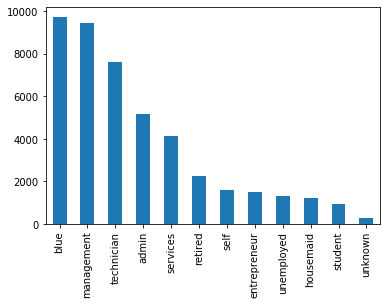

In [11]:
df['job'].value_counts().plot.bar()

In [12]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [14]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [15]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [16]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [17]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [18]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [19]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [20]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [21]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [22]:
df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [23]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [25]:
num_cols=df.select_dtypes(['int64']).columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [26]:
cat_cols=df.select_dtypes(['object']).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

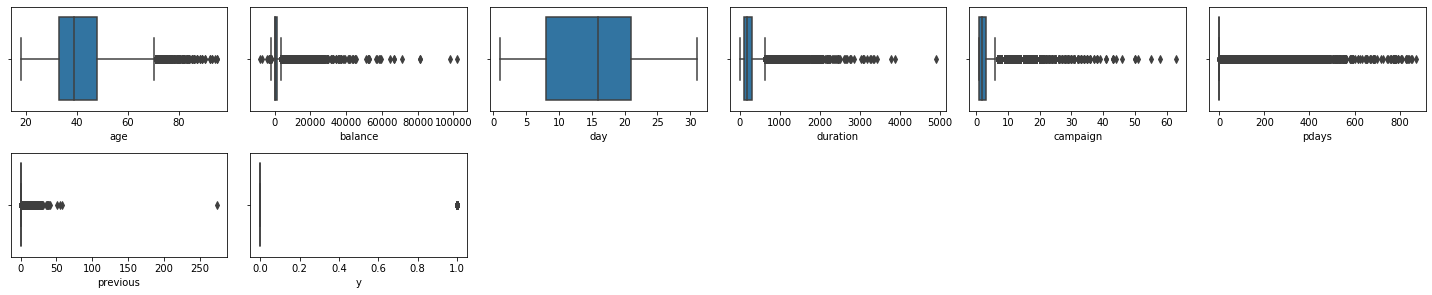

In [27]:
def draw_boxplots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(dataframe[feature],ax=ax)
        
    fig.tight_layout()  
    plt.show()
    
draw_boxplots(df,num_cols,10,6)

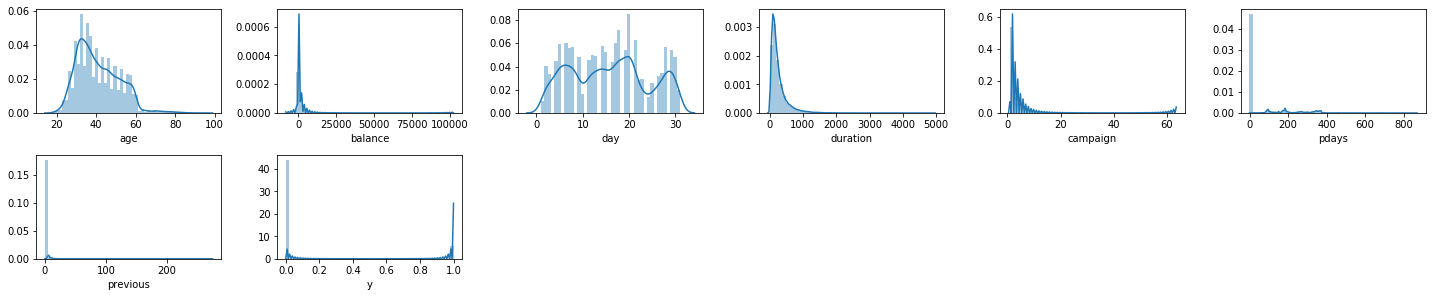

In [28]:
def draw_distplots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.distplot(dataframe[feature],ax=ax)
        
    fig.tight_layout()  
    plt.show()
    
draw_distplots(df,num_cols,10,6)

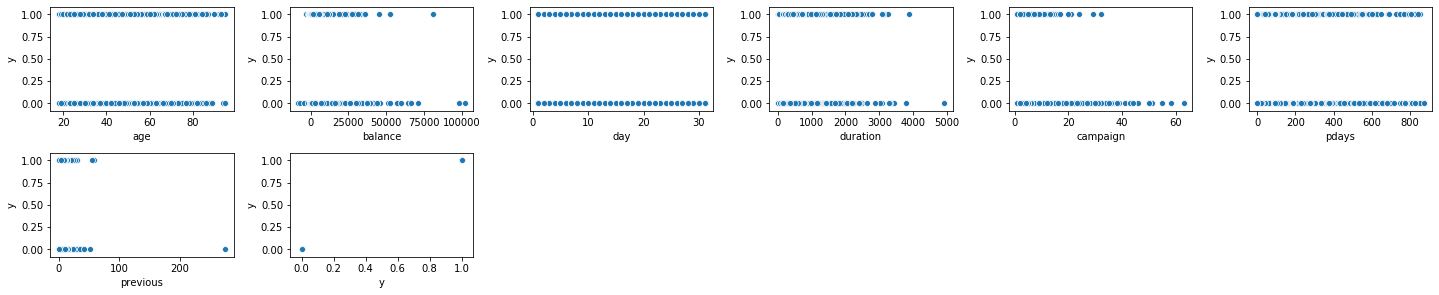

In [29]:
def draw_scatterplots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.scatterplot(dataframe[feature],dataframe['y'],ax=ax)
        
    fig.tight_layout()  
    plt.show()
    
draw_scatterplots(df,num_cols,10,6)

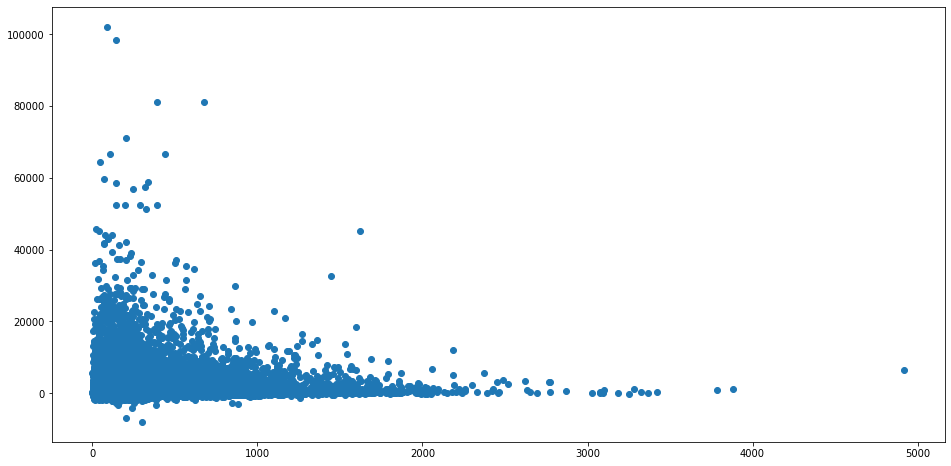

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['duration'],df['balance'])
plt.show()

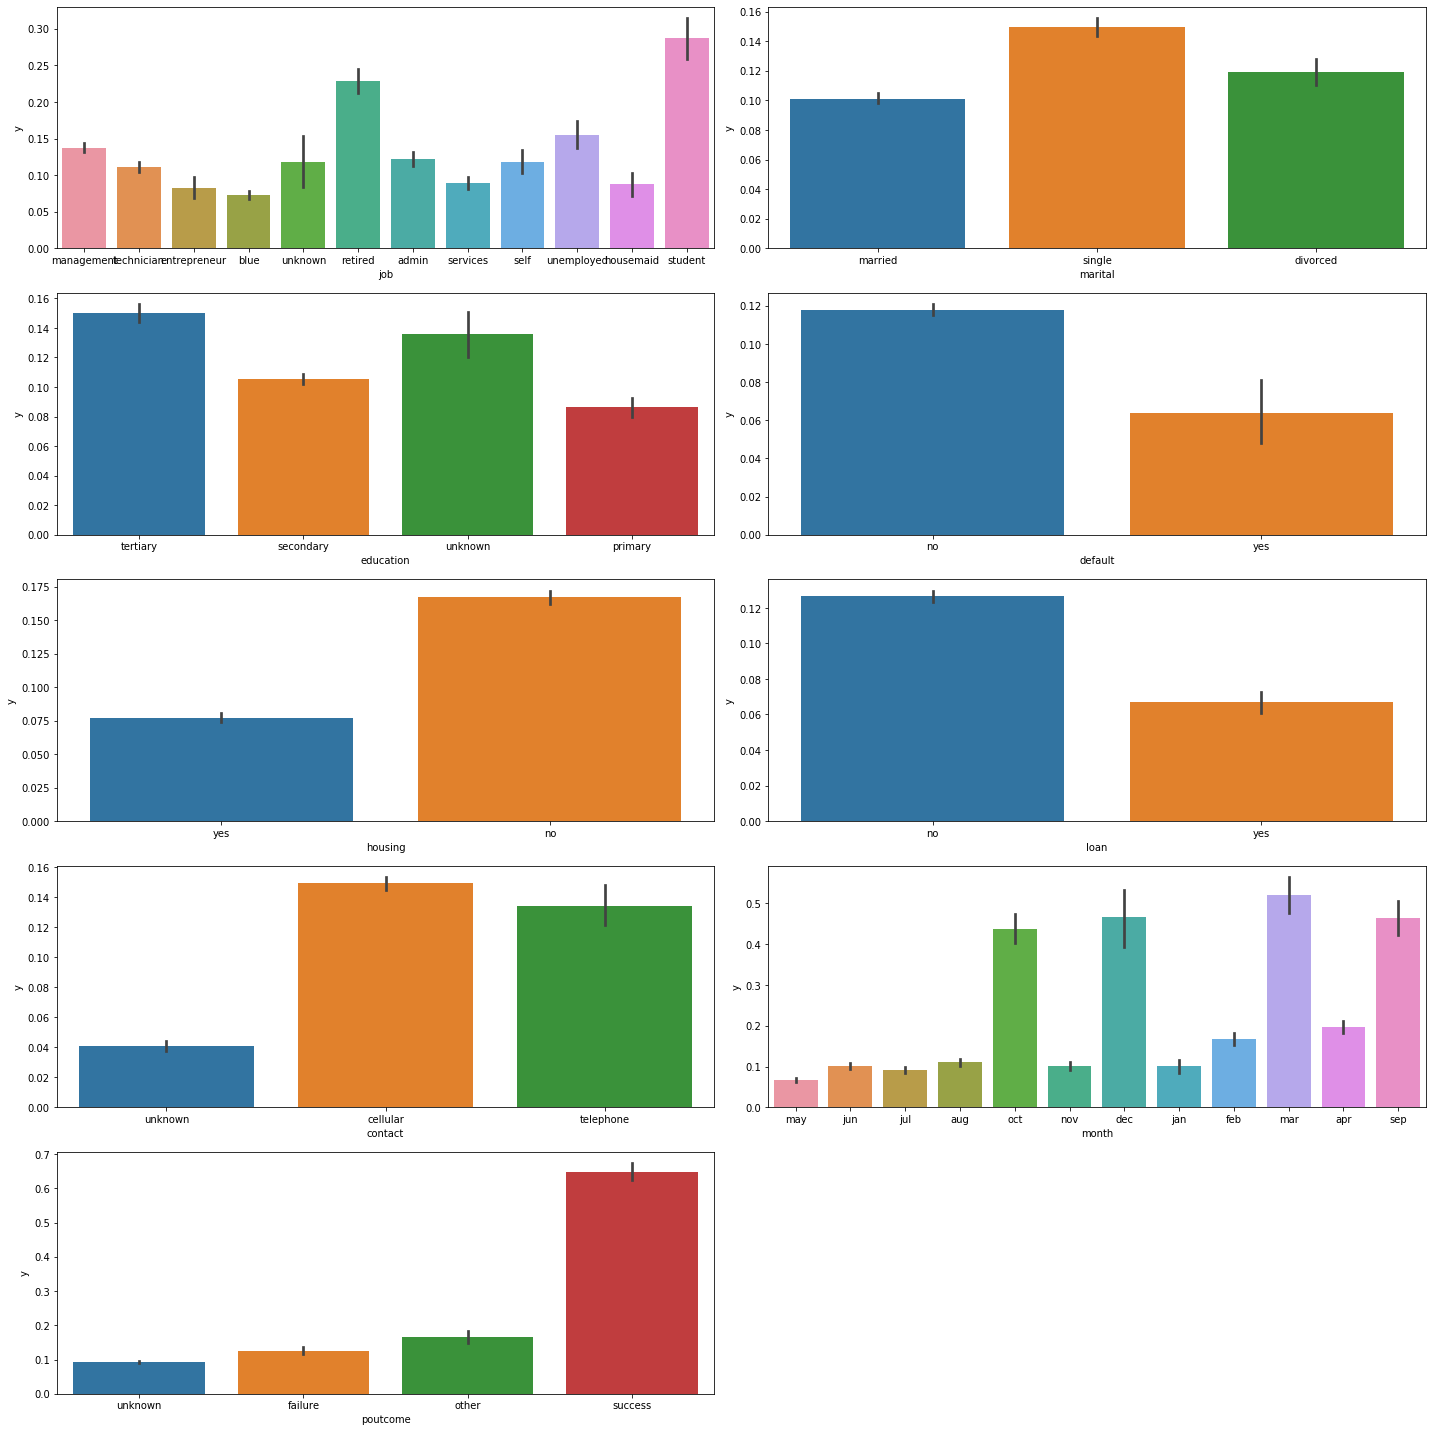

In [31]:
def draw_barplots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.barplot(dataframe[feature],dataframe['y'],ax=ax)
        
    fig.tight_layout()  
    plt.show()
    
draw_barplots(df,cat_cols,5,2)

In [32]:
for column in num_cols:    
    q1 = df[column].quantile(0.25)    # First Quartile
    q3 = df[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df[(df[column] < llimit) | (df[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))

Number of outliers in "age" : 487
Number of outliers in "balance" : 4729
Number of outliers in "day" : 0
Number of outliers in "duration" : 3235
Number of outliers in "campaign" : 3064
Number of outliers in "pdays" : 8257
Number of outliers in "previous" : 8257
Number of outliers in "y" : 5289


In [33]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [34]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


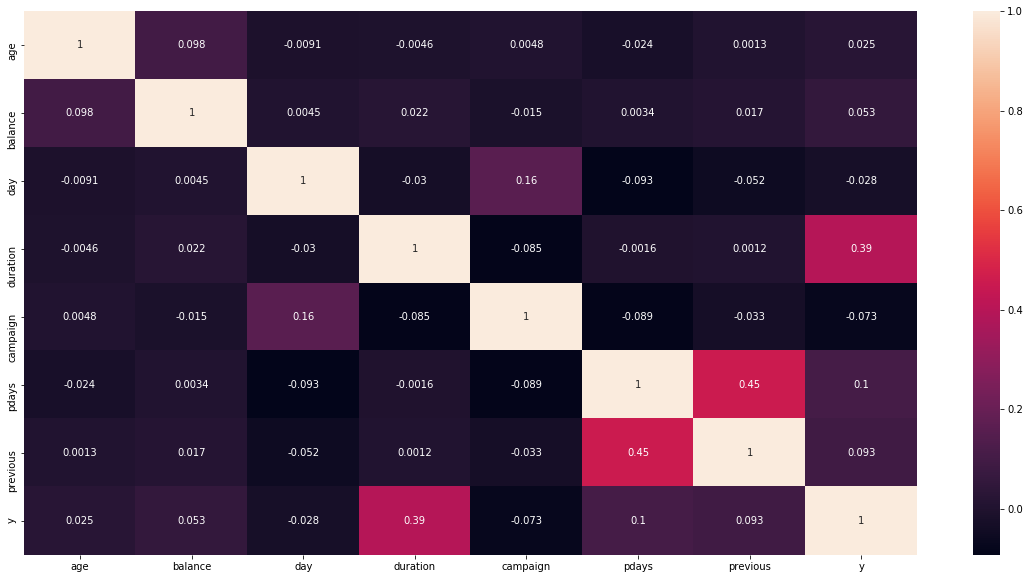

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [36]:
corr=df.corr()

In [37]:
corr['y']

age         0.025155
balance     0.052838
day        -0.028348
duration    0.394521
campaign   -0.073172
pdays       0.103621
previous    0.093236
y           1.000000
Name: y, dtype: float64

In [38]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [39]:
df[['job', 'y']].groupby("job").mean().reset_index().sort_values("y", ascending=False)

,job,y
8,student,0.286780
5,retired,0.227915
10,unemployed,0.155027
4,management,0.137556
0,admin,0.122027
6,self,0.118429
11,unknown,0.118056
9,technician,0.110570
7,services,0.088830
3,housemaid,0.087903


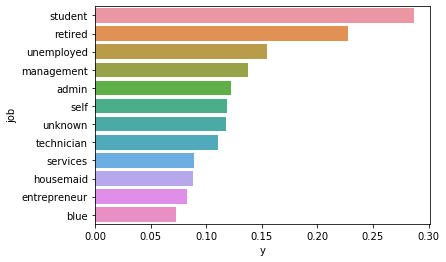

In [40]:
data1 = df[['job', 'y']].groupby("job").mean().reset_index().sort_values("y", ascending=False)
sns.barplot(y = "job", x = 'y',data = data1)

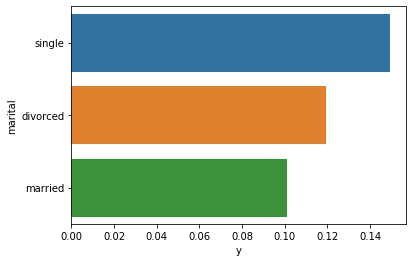

In [41]:
data2 = df[['marital', 'y']].groupby("marital").mean().reset_index().sort_values("y", ascending=False)
sns.barplot(y = "marital", x = 'y',data = data2)

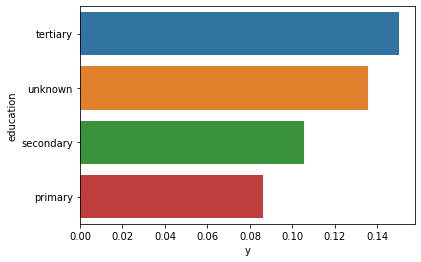

In [42]:
data2 = df[['education', 'y']].groupby("education").mean().reset_index().sort_values("y", ascending=False)
sns.barplot(y = "education", x = 'y',data = data2)

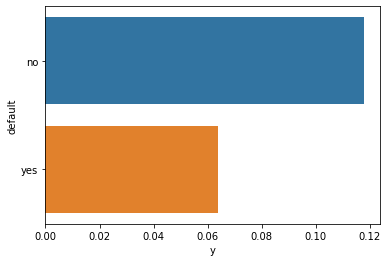

In [43]:
data2 = df[['default', 'y']].groupby("default").mean().reset_index().sort_values("y", ascending=False)
sns.barplot(y = "default", x = 'y',data = data2)

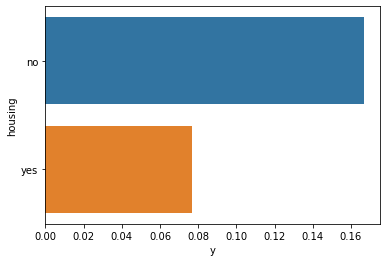

In [44]:
data2 = df[['housing', 'y']].groupby("housing").mean().reset_index().sort_values("y", ascending=False)
sns.barplot(y = "housing", x = 'y',data = data2)

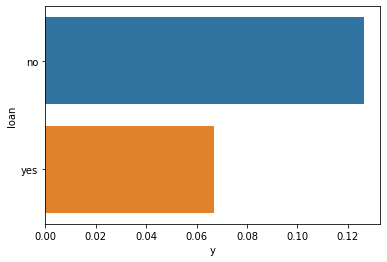

In [45]:
data2 = df[['loan', 'y']].groupby("loan").mean().reset_index().sort_values("y", ascending=False)
sns.barplot(y = "loan", x = 'y',data = data2)

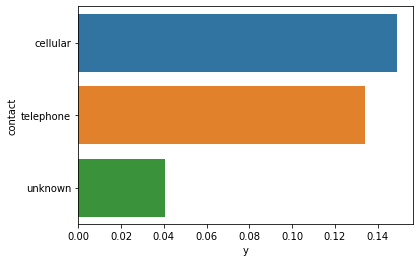

In [46]:
data2 = df[['contact', 'y']].groupby("contact").mean().reset_index().sort_values("y", ascending=False)
sns.barplot(y = "contact", x = 'y',data = data2)

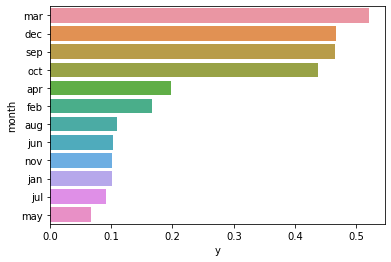

In [47]:
data2 = df[['month', 'y']].groupby("month").mean().reset_index().sort_values("y", ascending=False)
sns.barplot(y = "month", x = 'y',data = data2)

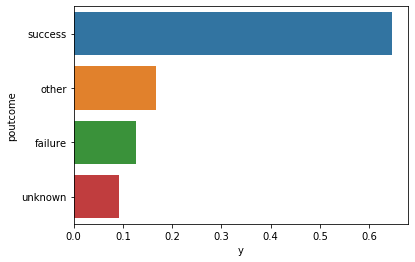

In [48]:
data2 = df[['poutcome', 'y']].groupby("poutcome").mean().reset_index().sort_values("y", ascending=False)
sns.barplot(y = "poutcome", x = 'y',data = data2)

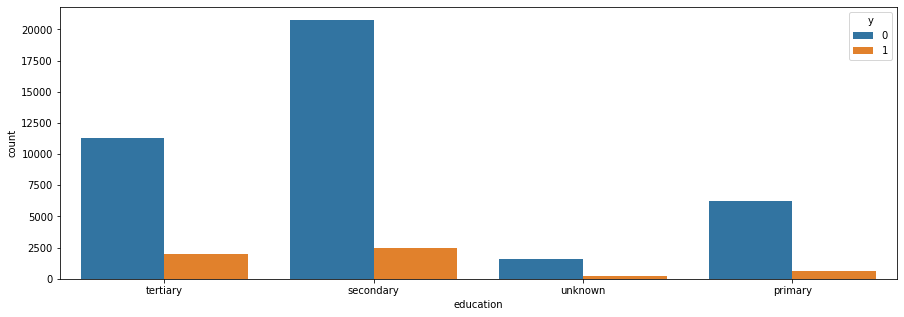

In [49]:
fig, axes = plt.subplots(1,1, figsize = (15,5))
sns.countplot(x = df['education'], hue = df["y"])

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
labelencoder = LabelEncoder()

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if(df[col].dtype == 'object'):
        df.loc[:,col] = le.fit_transform(df.loc[:,col])

In [53]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [54]:
df_dummies= pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],drop_first=True,)

In [55]:
df_dummies.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_1,job_2,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_1,poutcome_2,poutcome_3
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [56]:
df_dummies.columns


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'job_9', 'job_10', 'job_11', 'marital_1', 'marital_2',
       'education_1', 'education_2', 'education_3', 'default_1', 'housing_1',
       'loan_1', 'contact_1', 'contact_2', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'poutcome_1', 'poutcome_2', 'poutcome_3'],
      dtype='object')

In [57]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age            45211 non-null int64
balance        45211 non-null int64
day            45211 non-null int64
duration       45211 non-null int64
campaign       45211 non-null int64
pdays          45211 non-null int64
previous       45211 non-null int64
y              45211 non-null int64
job_1          45211 non-null uint8
job_2          45211 non-null uint8
job_3          45211 non-null uint8
job_4          45211 non-null uint8
job_5          45211 non-null uint8
job_6          45211 non-null uint8
job_7          45211 non-null uint8
job_8          45211 non-null uint8
job_9          45211 non-null uint8
job_10         45211 non-null uint8
job_11         45211 non-null uint8
marital_1      45211 non-null uint8
marital_2      45211 non-null uint8
education_1    45211 non-null uint8
education_2    45211 non-null uint8
education_3    45211 non-null uint8
default_1      45211 non-nu

In [58]:
from scipy.stats import ttest_ind

In [59]:
t_statistic,p_value=ttest_ind(df[df['y']==1]['balance'],df[df['y']==0]['balance'])
print(t_statistic,p_value)

11.25043445878562 2.5211136918751468e-29


In [60]:
t_statistic,p_value=ttest_ind(df[df['y']==1]['age'],df[df['y']==0]['age'])
print(t_statistic,p_value)

5.350255423036203 8.825643691922395e-08


In [61]:
t_statistic,p_value=ttest_ind(df[df['y']==1]['day'],df[df['y']==0]['day'])
print(t_statistic,p_value)

-6.029843252838383 1.653880160817521e-09


In [62]:
t_statistic,p_value=ttest_ind(df[df['y']==1]['duration'],df[df['y']==0]['duration'])
print(t_statistic,p_value)

91.28943612670862 0.0


In [63]:
t_statistic,p_value=ttest_ind(df[df['y']==1]['campaign'],df[df['y']==0]['campaign'])
print(t_statistic,p_value)

-15.599948860003781 1.0123473642096297e-54


In [64]:
t_statistic,p_value=ttest_ind(df[df['y']==1]['pdays'],df[df['y']==0]['pdays'])
print(t_statistic,p_value)

22.151671780724012 3.790553319478034e-108


In [65]:
t_statistic,p_value=ttest_ind(df[df['y']==1]['previous'],df[df['y']==0]['previous'])
print(t_statistic,p_value)

19.910901271473993 7.801830349805211e-88


In [66]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('balance ~ job', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq       df          F    PR(>F)
job       1.393118e+08      1.0  15.031933  0.000106
Residual  4.189845e+11  45209.0        NaN       NaN


In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pylab
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [68]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [69]:
X = df_dummies.drop('y',axis=1)
y = df_dummies["y"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2) # 0.3 test_size means 20%

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(31647, 42) (31647,)
(13564, 42) (13564,)


In [71]:
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.9012228647265144
R^2 score for test: 0.9042317900324388


In [72]:
import statsmodels.api as sm
Xc=sm.add_constant(X)
logit_model=sm.Logit(y,Xc)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.238463
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45168
Method:                           MLE   Df Model:                           42
Date:                Sun, 22 Dec 2019   Pseudo R-squ.:                  0.3392
Time:                        11:01:37   Log-Likelihood:                -10781.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.5356      0.184    -13.803      0.000      -2.896      -2.176
age             0.0001      0.002      0.051      0.959      -0.004       0.004
balance      1.284e-05   5.15e-06      2.493      0.013    2.75e-06    2.29e-05
day             0.0100      0.002      3.993      0.000       0.005       0.015
duration        0.0042   6.45e-05     64.985      0.000       0.004       0.004
campaign       -0.0908      0.010     -8.955      0.000      -0.111      -0.071
pdays          -0.0001      0.000     -0.335      0.737      -0.001       0.000
previous        0.0102      0.007      1.561      0.118      -0.003       0.023
job_1          -0.3099      0.073     -4.264      0.000      -0.452      -0.167
job_2          -0.3571      0.126     -2.844      0.004      -0.603      -0.111
job_3          -0.5040      0.136     -3.693      0.000      -0.771      -0.237
job_4          -0.1653      0.073     -2.255      0.024      -0.309      -0.022
job_5           0.2524      0.097      2.596      0.009       0.062       0.443
job_6          -0.2983      0.112     -2.664      0.008      -0.518      -0.079
job_7          -0.2238      0.084     -2.662      0.008      -0.389      -0.059
job_8           0.3821      0.109      3.505      0.000       0.168       0.596
job_9          -0.1760      0.069     -2.553      0.011      -0.311      -0.041
job_10         -0.1767      0.112     -1.583      0.113      -0.396       0.042
job_11         -0.3133      0.233     -1.342      0.180      -0.771       0.144
marital_1      -0.1795      0.059     -3.046      0.002      -0.295      -0.064
marital_2       0.0925      0.067      1.375      0.169      -0.039       0.224
education_1     0.1835      0.065      2.833      0.005       0.057       0.311
education_2     0.3789      0.075      5.031      0.000       0.231       0.527
education_3     0.2505      0.104      2.411      0.016       0.047       0.454
default_1      -0.0167      0.163     -0.102      0.918      -0.336       0.302
housing_1      -0.6754      0.044    -15.395      0.000      -0.761      -0.589
loan_1         -0.4254      0.060     -7.091      0.000      -0.543      -0.308
contact_1      -0.1634      0.075     -2.173      0.030      -0.311      -0.016
contact_2      -1.6232      0.073    -22.183      0.000      -1.767      -1.480
month_1        -0.6939      0.078     -8.842      0.000      -0.848      -0.540
month_2         0.6911      0.177      3.912      0.000       0.345       1.037
month_3        -0.1473      0.089     -1.648      0.099      -0.323       0.028
month_4        -1.2617      0.122    -10.367      0.000      -1.500      -1.023
month_5        -0.8308      0.077    -10.733      0.000      -0.983      -0.679
month_6         0.4536      0.094      4.843      0.000       0.270       0.637
month_7         1.5899      0.120     13.265      0.000       1.355       1.825
month_8        -0.3991      0.072     -5.521      0.000      -0.541      -0.257
month_9        -0.8734      0.084    -10.

In [73]:
from sklearn.feature_selection import RFE
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [74]:
no_of_cols=len(X_train.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

score_list=[]

for n in range(no_of_cols):
    model=LR()
    rfe=RFE(model,n+1)
    X_train_rfe=rfe.fit_transform(X_train,y_train)
    model.fit(X_train_rfe,y_train)
    
    
    X_test_rfe=rfe.transform(X_test)
    score=model.score(X_test_rfe,y_test)
    
    score_list.append(score)

In [75]:
len(score_list)

42

In [76]:
score_list

[0.10640361589168068,
 0.12132149440360773,
 0.12504239814179785,
 0.13322267210279437,
 0.13646036621378999,
 0.13710965659494978,
 0.14596559550290966,
 0.14913033226247496,
 0.1494634143953636,
 0.1513040996095344,
 0.15311639985413328,
 0.15534163725184846,
 0.15621709250048532,
 0.15638578414915894,
 0.15688129783892424,
 0.15696637142010705,
 0.15672775503916336,
 0.15909033635455183,
 0.15995464831791506,
 0.15977878114370203,
 0.15972047356247354,
 0.16004882013836996,
 0.16087050086525523,
 0.16080184645923346,
 0.1608275736435647,
 0.16086395485772542,
 0.16083830327598325,
 0.1607162837175211,
 0.16079971784282443,
 0.16077479908255754,
 0.16067900500065835,
 0.16066635769463444,
 0.1605561776636768,
 0.16059112270755527,
 0.16075129789210008,
 0.16229051340673373,
 0.16194484477376903,
 0.16211984628561926,
 0.3061488969288916,
 0.305978292909704,
 0.3059768699905293,
 0.3061805368195093]

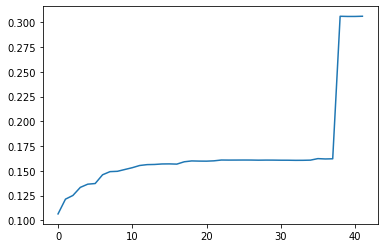

In [77]:
plt.plot(score_list)
plt.show()

In [78]:
from sklearn.feature_selection import RFE
model=LogisticRegression()
rfe=RFE(model,10)

X_rfe=rfe.fit_transform(X_train,y_train)
model.fit(X_rfe,y_train)

print(rfe.support_)
print(rfe.ranking_)
X_r=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
X_r.columns=['col_name','support','ranking']
print(X_r)

[False False False False False False False False False False False False
 False False  True False False False False False False False False False
  True False False  True  True  True False  True False False  True False
 False  True  True False  True False]
[31 33 29 30 24 32 28 15 12  7 23  8 17 21  1 22 11 20 10 25 18 13 19 16
  1  4  9  1  1  1  6  1  2 26  1  5  3  1  1 14  1 27]
       col_name  support  ranking
0           age    False       31
1       balance    False       33
2           day    False       29
3      duration    False       30
4      campaign    False       24
5         pdays    False       32
6      previous    False       28
7         job_1    False       15
8         job_2    False       12
9         job_3    False        7
10        job_4    False       23
11        job_5    False        8
12        job_6    False       17
13        job_7    False       21
14        job_8     True        1
15        job_9    False       22
16       job_10    False       11
17

In [79]:
X1 = df.drop('y',axis=1)
y1 = df["y"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state = 2) # 0.3 test_size means 20%

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(31647, 16) (31647,)
(13564, 16) (13564,)


In [81]:
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.8901001674724303
R^2 score for test: 0.8928782070185786


In [82]:
import statsmodels.api as sm
Xc=sm.add_constant(X1)
logit_model=sm.Logit(y,Xc)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.267322
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45194
Method:                           MLE   Df Model:                           16
Date:                Sun, 22 Dec 2019   Pseudo R-squ.:                  0.2592
Time:                        11:02:38   Log-Likelihood:                -12086.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0771      0.147    -27.728      0.000      -4.365      -3.789
age            0.0084      0.002      4.992      0.000       0.005       0.012
job            0.0092      0.005      1.710      0.087      -0.001       0.020
marital        0.2231      0.031      7.189      0.000       0.162       0.284
education      0.1989      0.023      8.633      0.000       0.154       0.244
default       -0.3585      0.160     -2.243      0.025      -0.672      -0.045
balance     1.787e-05   4.52e-06      3.953      0.000    9.01e-06    2.67e-05
housing       -1.0368      0.038    -27.303      0.000      -1.111      -0.962
loan          -0.7041      0.057    -12.333      0.000      -0.816      -0.592
contact       -0.6452      0.027    -23.923      0.000      -0.698      -0.592
day           -0.0051      0.002     -2.470      0.014      -0.009      -0.001
month          0.0392      0.006      7.044      0.000       0.028       0.050
duration       0.0039    6.1e-05     64.712      0.000       0.004       0.004
campaign      -0.1311      0.010    -13.052      0.000      -0.151      -0.111
pdays          0.0036      0.000     14.108      0.000       0.003       0.004
previous       0.0893      0.008     11.140      0.000       0.074       0.105
poutcome       0.2300      0.029      7.877      0.000       0.173       0.287
==============================================================================
"""

In [83]:
no_of_cols=len(X_train.columns)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=45)

score_list=[]

for n in range(no_of_cols):
    model=LR()
    rfe=RFE(model,n+1)
    X_train_rfe=rfe.fit_transform(X_train,y_train)
    model.fit(X_train_rfe,y_train)
    
    
    X_test_rfe=rfe.transform(X_test)
    score=model.score(X_test_rfe,y_test)
    
    score_list.append(score)

In [84]:
len(score_list)

16

In [85]:
score_list

[0.01633331369043267,
 0.018739826826502437,
 0.03450011602535896,
 0.03477452044916107,
 0.035787418316633346,
 0.031124968337944866,
 0.032799198415220054,
 0.037710836077953225,
 0.04026332258165677,
 0.040631335203419994,
 0.04078459030155279,
 0.041330981572887726,
 0.19660212538923938,
 0.19650136937547846,
 0.2041415055712983,
 0.2048090321500555]

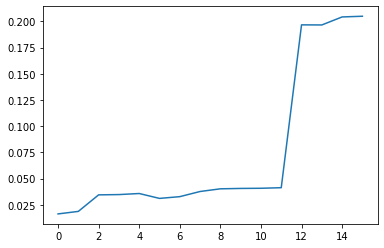

In [86]:
plt.plot(score_list)
plt.show()

In [87]:
from sklearn.feature_selection import RFE
model=LogisticRegression()
rfe=RFE(model,10)

X_rfe=rfe.fit_transform(X_train,y_train)
model.fit(X_rfe,y_train)

print((rfe.support_),'\n')

print((rfe.ranking_),'\n')

X_r=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
X_r.columns=['col_name','support','ranking']
print(X_r)

[ True False  True  True  True False  True  True  True False  True False
  True False  True False] 

[1 2 1 1 1 7 1 1 1 4 1 5 1 6 1 3] 

     col_name  support  ranking
0         age     True        1
1         job    False        2
2     marital     True        1
3   education     True        1
4     default     True        1
5     balance    False        7
6     housing     True        1
7        loan     True        1
8     contact     True        1
9         day    False        4
10      month     True        1
11   duration    False        5
12   campaign     True        1
13      pdays    False        6
14   previous     True        1
15   poutcome    False        3


In [88]:
def VIF(formula,data):
    import pip #To install packages
    #pip.main(["install","dmatrices"])
    #pip.main(["install","statsmodels"])
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) \
       for i in range(X.shape[1])]
    vif["features"] = X.columns
    return(vif.round(1))

In [89]:
VIF("y~ age + job + marital + education + default + balance + housing + loan + contact + day + month + duration + campaign + pdays + previous + poutcome",data = df)

,VIF Factor,features
0,87.3,Intercept
1,1.3,age
2,1.0,job
3,1.2,marital
4,1.1,education
5,1.0,default
6,1.0,balance
7,1.2,housing
8,1.0,loan
9,1.3,contact
